In [ ]:
!pip install openai

In [ ]:
# import openai
from openai import OpenAI
OPENAI_API_KEY = "YOUR_OPENAI_API_KEY"

### Schema Information

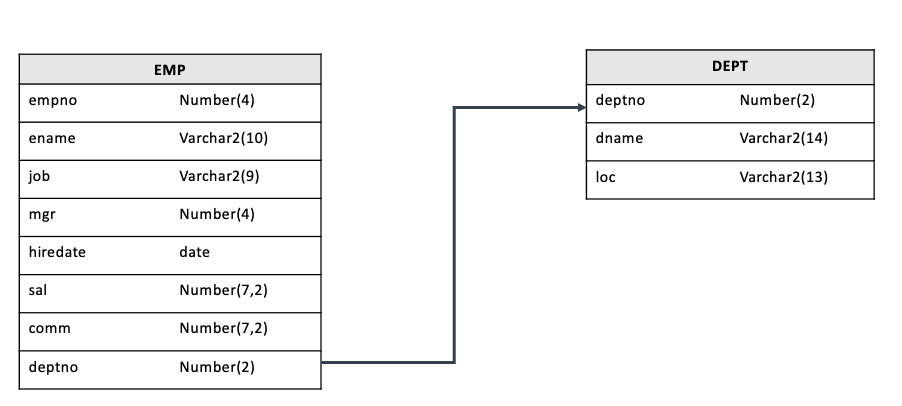

In [ ]:
'''
nlq와 prompt를 바꿔가면서 결과값이 어떻게 나오는지 실험해보세요.
'''

schema_prompt = """### [Schema]
# DEPT (DEPTNO, DNAME, LOC)
# EMP (EMPNO, ENAME, JOB, MGR, HIREDATE, SAL, COMM, DEPTNO)
# EMP.DEPTNO references DEPT.DEPTNO
"""

### User's Question

In [ ]:
nlq = "Display all employee whose location is DALLAS. "

### Final Prompt

In [ ]:
final_prompt = f"""Create the Postgres SQL Query using the following schema.
Return only the SQL statement.

{schema_prompt}

[Question]
{nlq}

[SQL]
SELECT
"""

### Connect OpenAI and get the response

In [ ]:
client = OpenAI(api_key=OPENAI_API_KEY)

response = client.chat.completions.create(
  model='gpt-4o',
  messages=[
      {"role": "user", "content": final_prompt},
  ],
  max_tokens=4096,
  temperature=0
)

In [ ]:
response.choices[0].message.content

"```sql\nSELECT \n    EMP.*\nFROM \n    EMP\nJOIN \n    DEPT ON EMP.DEPTNO = DEPT.DEPTNO\nWHERE \n    DEPT.LOC = 'DALLAS';\n```"